# Лабораторна робота № 4
<hr>

## 1. Виконання лінійної регресії однієї змінної

### 1.1 Відображення на графіку вхідних даних 

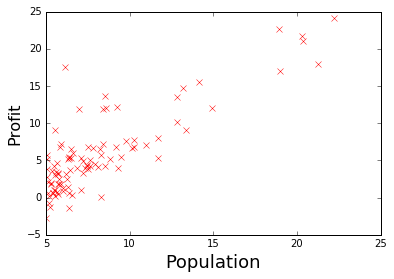

In [25]:
import pandas as pd
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
%matplotlib inline

data = pd.read_csv('lab4data1.txt', header=None)
data.columns = ['Population', 'Profit']

x = data['Population']
y = data['Profit']
plt.xlabel('Population', fontsize=18);
plt.ylabel('Profit', fontsize=16);
plt.plot(x, y, 'rx');

### 1.2 Побудова моделі лінійної регресії однієї змінної

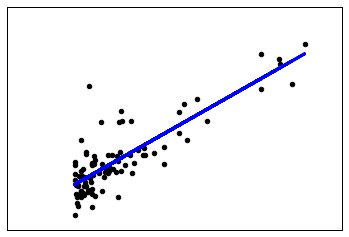

In [26]:
data_X_train = np.transpose(np.array([data['Population']]))
data_y_train = np.transpose(np.array([data['Profit']]))

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(data_X_train, data_y_train)

plt.scatter(data_X_train, data_y_train,  color='black');
plt.plot(data_X_train, regr.predict(data_X_train), color='blue',
         linewidth=3);

plt.xticks(())
plt.yticks(())

a, b = 3.5, 7

df2 = pd.DataFrame(np.array([[a*10000,regr.predict(a)*10000],[b*10000,regr.predict(b)*10000]]))
df2.columns = ['Population','Profit']

# regr.score(data_X_train,data_y_train)

### 1.3 Прогнозування ціни для населення розміром 35,000 і 70,000:

In [27]:
df2

,Population,Profit
0,35000,2798.368764
1,70000,44554.546310


## 2. Виконання лінійної регресії багатьох змінних

### 2.1 Побудова моделі регресії багатьох змінних

In [28]:
data = pd.read_csv('lab4data2.txt', header=None)
data.columns = ['Area', 'Rooms', 'Price']

# Normalize data
def normalize(data):
    return (data - data.mean()) / (data.max() - data.min())

def restore_pre_normalized(value, data):
    return float(value) * (float(data.max()) - float(data.min())) + float(data.mean())
    
data_X = data.drop('Price', axis=1)
data_y = data.drop(['Area','Rooms'], axis=1)
data_y_norm = normalize(data_y)

regr = linear_model.LinearRegression()
regr.fit(data_X, data_y_norm)

prediction_test = np.array([1650,3]).reshape(1,-1)
prediction = regr.predict(prediction_test)

# Restore pre-normalized price
res = restore_pre_normalized(float(prediction), data_y)
print("Ціна за квартиру з параметрами [{}, {}]: {}".format(prediction_test[0][0], prediction_test[0][1],res))

print("Точність моделі: ", regr.score(data_X, data_y_norm))


Ціна за квартиру з параметрами [1650, 3]: 293081.4643348962
Точність моделі:  0.732945018029
